# Fast Fourier Transform Example

## Fig 10.5

In [1]:
"""
Fast Fourier Transform Example
------------------------------
Figure 10.5

The discrete Fourier transform (bottom panel) for two noisy data sets shown in
the top panel. For 512 evenly sampled times t (dt = 0.977), points are drawn
from h(t) = a + sin(t)G(t), where G(t) is a Gaussian N(mu = 0,sigma = 10).
Gaussian noise with sigma = 0.05 (top data set) and 0.005 (bottom data set)
is added to signal h(t). The value of the offset a is 0.15 and 0, respectively.
The discrete Fourier transform is computed as described in Section 10.2.3.
For both noise realizations, the correct frequency f = (2pi)-1 ~ 0.159 is
easily discernible in the bottom panel. Note that the height of peaks is the
same for both noise realizations. The large value of abs(H(f = 0)) for data
with larger noise is due to the vertical offset.
"""



'\nThe effect of Sampling\n----------------------\nFigure 10.4\n\nAn illustration of the impact of a sampling window function of resulting PSD.\nThe top-left panel shows a simulated data set with 40 points drawn from the\nfunction y(t|P) = sin(t) (i.e., f = 1/(2pi) ~ 0.16). The sampling is random,\nand illustrated by the vertical lines in the bottom-left panel. The PSD of\nsampling times, or spectral window, is shown in the bottom-right panel. The\nPSD computed for the data set from the top-left panel is shown in the top-right\npanel; it is equal to a convolution of the single peak (shaded in gray) with\nthe window PSD shown in the bottom-right panel (e.g., the peak at f ~ 0.42 in\nthe top-right panel can be traced to a peak at f ~ 0.26 in the bottom-right\npanel).\n'

In [1]:
import numpy as np
from matplotlib import pyplot as plt


from scipy.fftpack import fft
from scipy.stats import norm

from astroML.fourier import PSD_continuous


In [3]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec

In [4]:
N=10
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 7.5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


In [6]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=18, usetex=True)

# Draw the data

In [2]:
#------------------------------------------------------------
# Draw the data
np.random.seed(1)

tj = np.linspace(-25, 25, 512)
hj = np.sin(tj)
hj *= norm(0, 10).pdf(tj)

#------------------------------------------------------------


# plot the results

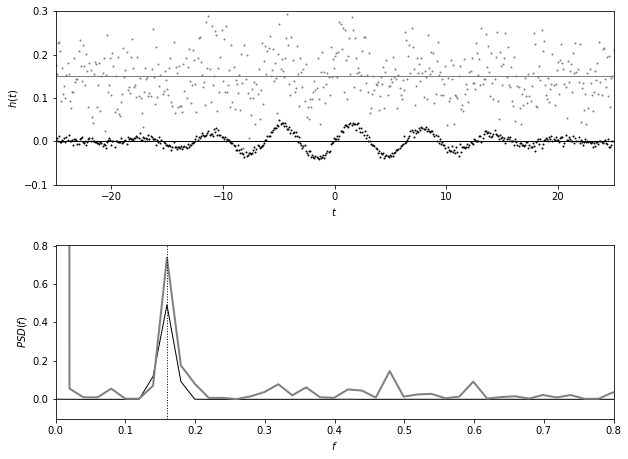

In [4]:
#------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(10, 7.5))
fig.subplots_adjust(hspace=0.35)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

offsets = (0, 0.15)
colors = ('black', 'gray')
linewidths = (1, 2)
errors = (0.005, 0.05)

for (offset, color, error, linewidth) in zip(offsets, colors,
                                             errors, linewidths):
    # compute the PSD
    err = np.random.normal(0, error, size=hj.shape)
    hj_N = hj + err + offset
    fk, PSD = PSD_continuous(tj, hj_N)

    # plot the data and PSD
    ax1.scatter(tj, hj_N, s=4, c=color, lw=0)
    ax1.plot(tj, 0 * tj + offset, '-', c=color, lw=1)
    ax2.plot(fk, PSD, '-', c=color, lw=linewidth)

# vertical line marking the expected peak location
ax2.plot([0.5 / np.pi, 0.5 / np.pi], [-0.1, 1], ':k', lw=1)

ax1.set_xlim(-25, 25)
ax1.set_ylim(-0.1, 0.3001)

ax1.set_xlabel('$t$')
ax1.set_ylabel('$h(t)$')

ax1.yaxis.set_major_locator(plt.MultipleLocator(0.1))

ax2.set_xlim(0, 0.8)
ax2.set_ylim(-0.101, 0.801)

ax2.set_xlabel('$f$')
ax2.set_ylabel('$PSD(f)$')

plt.show()
